In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Doading Dataset

In [3]:
X = pd.read_csv('data/playlists_mod.csv')

In [4]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,popularity,release_date_ordinal
0,0.733,0.812,-4.634,0.0421,0.02240,0.000962,0.1670,0.409,122.985,39C3SOi6UMD9rHeXAQPNa9,154471,53,738568
1,0.733,0.855,-4.951,0.0528,0.38800,0.000001,0.1410,0.163,111.958,5cBz1eRdiLpTVcKBZkHnul,166092,44,738554
2,0.698,0.781,-5.615,0.0401,0.14300,0.000000,0.0762,0.851,124.017,2tX3PY8eP3h9XaBcLXuRBa,166573,71,738560
3,0.863,0.874,-4.798,0.0884,0.00712,0.087800,0.0455,0.811,125.020,6OHQzBYaXeF6FVu8gxLMkE,144025,46,738568
4,0.727,0.695,-6.190,0.0518,0.00839,0.000000,0.1100,0.811,127.995,164QjgWOxnSZYHQghRKeC0,193382,68,738561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,0.646,0.464,-9.954,0.4090,0.06950,0.887000,0.1400,0.703,197.399,1uy8jY4k6SmI2Zr6fwbldQ,241306,28,737546
3400,0.946,0.714,-4.598,0.0999,0.00658,0.076100,0.0590,0.823,113.049,7gWTNLC7MX5L9Ii2Ojggto,324078,19,737224
3401,0.298,0.968,-4.893,0.0539,0.04810,0.869000,0.2790,0.776,173.540,6d2O45piXdSJ1ieRFuYYXn,222533,28,738302
3402,0.542,0.915,-3.294,0.1910,0.02150,0.828000,0.2000,0.642,136.020,4wIMg49wp66ned9IZ6QUzf,208385,28,736762


In [5]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release_date_ordinal
count,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3.404000e+03,3404.000000,3404.000000
mean,0.545709,0.622610,-8.881024,0.081520,0.285579,0.185051,0.182890,0.498656,120.200104,2.355078e+05,40.899236,734516.794947
std,0.178105,0.268161,5.758301,0.079537,0.336424,0.331270,0.150514,0.262487,31.236822,1.064537e+05,17.597522,5009.962351
min,0.000000,0.002120,-43.738000,0.000000,0.000001,0.000000,0.022000,0.000000,0.000000,6.180000e+04,0.000000,707600.000000
25%,0.431000,0.446750,-10.531500,0.037100,0.008060,0.000000,0.093700,0.290750,95.009750,1.813870e+05,29.000000,732312.000000
50%,0.552000,0.661000,-7.254500,0.050100,0.119000,0.000324,0.121000,0.497500,117.928000,2.148600e+05,39.000000,736626.000000
75%,0.670000,0.855000,-5.069000,0.089925,0.509000,0.151500,0.227000,0.713000,141.452000,2.582670e+05,53.250000,738125.000000
max,0.975000,0.998000,-1.320000,0.962000,0.996000,0.980000,0.980000,0.985000,206.534000,1.904453e+06,88.000000,738568.000000


In [6]:
# Extract numerical cols
X_num = X.select_dtypes(include=['float64', 'int64'])

In [7]:
X_num

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release_date_ordinal
0,0.733,0.812,-4.634,0.0421,0.02240,0.000962,0.1670,0.409,122.985,154471,53,738568
1,0.733,0.855,-4.951,0.0528,0.38800,0.000001,0.1410,0.163,111.958,166092,44,738554
2,0.698,0.781,-5.615,0.0401,0.14300,0.000000,0.0762,0.851,124.017,166573,71,738560
3,0.863,0.874,-4.798,0.0884,0.00712,0.087800,0.0455,0.811,125.020,144025,46,738568
4,0.727,0.695,-6.190,0.0518,0.00839,0.000000,0.1100,0.811,127.995,193382,68,738561
...,...,...,...,...,...,...,...,...,...,...,...,...
3399,0.646,0.464,-9.954,0.4090,0.06950,0.887000,0.1400,0.703,197.399,241306,28,737546
3400,0.946,0.714,-4.598,0.0999,0.00658,0.076100,0.0590,0.823,113.049,324078,19,737224
3401,0.298,0.968,-4.893,0.0539,0.04810,0.869000,0.2790,0.776,173.540,222533,28,738302
3402,0.542,0.915,-3.294,0.1910,0.02150,0.828000,0.2000,0.642,136.020,208385,28,736762


## Scaling features

In [8]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled_df = pd.DataFrame(X_scaled, columns = X_num.columns)
display(X_num.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release_date_ordinal
0,0.733,0.812,-4.634,0.0421,0.02240,0.000962,0.1670,0.409,122.985,154471,53,738568
1,0.733,0.855,-4.951,0.0528,0.38800,0.000001,0.1410,0.163,111.958,166092,44,738554
2,0.698,0.781,-5.615,0.0401,0.14300,0.000000,0.0762,0.851,124.017,166573,71,738560
3,0.863,0.874,-4.798,0.0884,0.00712,0.087800,0.0455,0.811,125.020,144025,46,738568
4,0.727,0.695,-6.190,0.0518,0.00839,0.000000,0.1100,0.811,127.995,193382,68,738561


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release_date_ordinal
0,1.051732,0.706361,0.737656,-0.495690,-0.782397,-0.555789,-0.105585,-0.341615,0.089167,-0.761352,0.687741,0.808749
1,1.051732,0.866736,0.682597,-0.361142,0.304485,-0.558690,-0.278352,-1.278943,-0.263897,-0.652171,0.176230,0.805954
2,0.855190,0.590742,0.567269,-0.520839,-0.423869,-0.558693,-0.708940,1.342527,0.122210,-0.647652,1.710763,0.807152
3,1.781746,0.937600,0.709172,0.086514,-0.827823,-0.293613,-0.912937,1.190116,0.154324,-0.859494,0.289900,0.808749
4,1.018039,0.269991,0.467398,-0.373716,-0.824047,-0.558693,-0.484343,1.190116,0.249579,-0.395778,1.540259,0.807351


## Choosing Number of Clusters

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

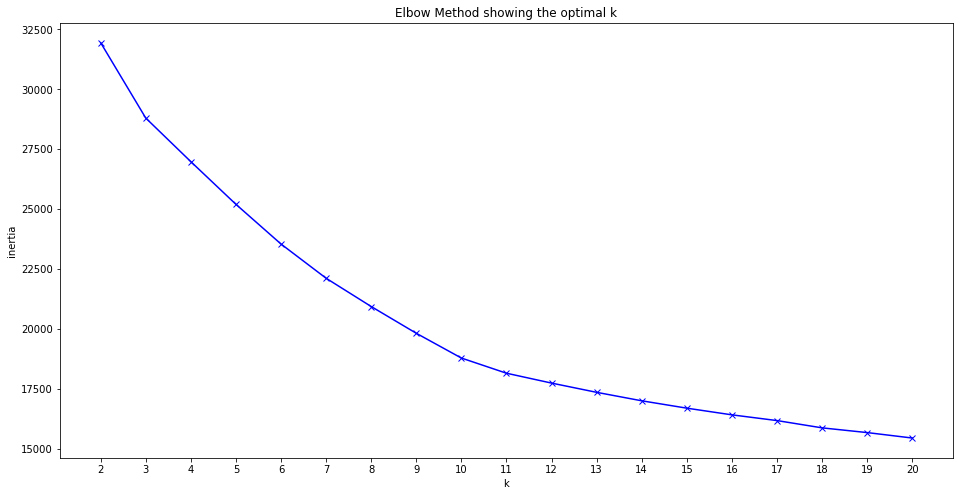

In [9]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

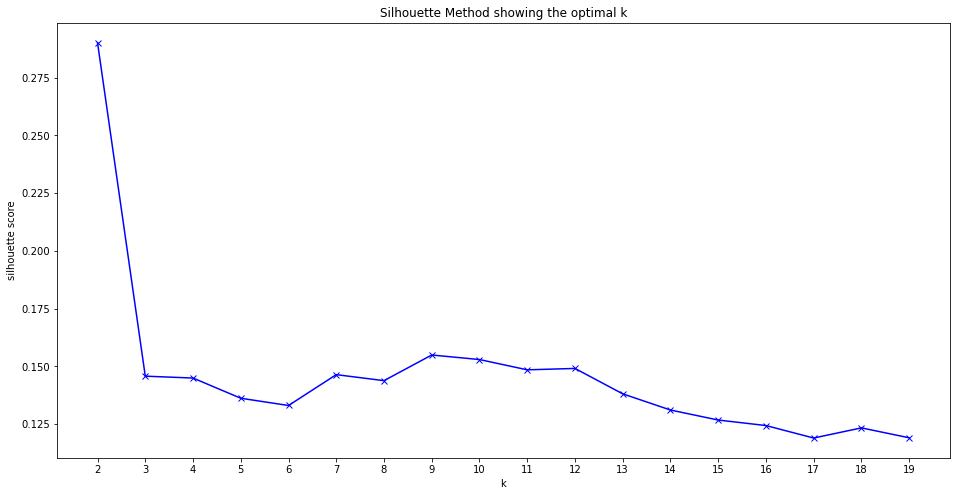

In [10]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

## Clustering the tracks with K-Means

In [16]:
kmeans = KMeans(n_clusters = 10, random_state = 1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=10, random_state=1234)

In [17]:
kmeans.labels_

array([2, 2, 2, ..., 8, 0, 0], dtype=int32)

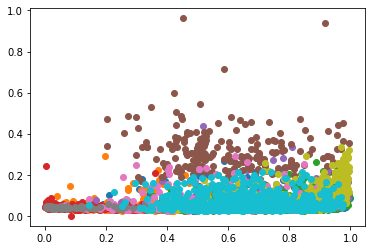

In [18]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
# show the plot
pyplot.show()

In [19]:
labels

array([2, 2, 2, ..., 8, 0, 0], dtype=int32)

In [20]:
clusters = kmeans.predict(X_scaled_df)

pd.Series(clusters).value_counts().sort_index()

0    316
1    350
2    673
3    282
4    162
5    203
6    243
7     73
8    493
9    609
dtype: int64

In [21]:
X["cluster"] = clusters
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,popularity,release_date_ordinal,cluster
0,0.733,0.812,-4.634,0.0421,0.02240,0.000962,0.1670,0.409,122.985,39C3SOi6UMD9rHeXAQPNa9,154471,53,738568,2
1,0.733,0.855,-4.951,0.0528,0.38800,0.000001,0.1410,0.163,111.958,5cBz1eRdiLpTVcKBZkHnul,166092,44,738554,2
2,0.698,0.781,-5.615,0.0401,0.14300,0.000000,0.0762,0.851,124.017,2tX3PY8eP3h9XaBcLXuRBa,166573,71,738560,2
3,0.863,0.874,-4.798,0.0884,0.00712,0.087800,0.0455,0.811,125.020,6OHQzBYaXeF6FVu8gxLMkE,144025,46,738568,9
4,0.727,0.695,-6.190,0.0518,0.00839,0.000000,0.1100,0.811,127.995,164QjgWOxnSZYHQghRKeC0,193382,68,738561,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,0.646,0.464,-9.954,0.4090,0.06950,0.887000,0.1400,0.703,197.399,1uy8jY4k6SmI2Zr6fwbldQ,241306,28,737546,5
3400,0.946,0.714,-4.598,0.0999,0.00658,0.076100,0.0590,0.823,113.049,7gWTNLC7MX5L9Ii2Ojggto,324078,19,737224,9
3401,0.298,0.968,-4.893,0.0539,0.04810,0.869000,0.2790,0.776,173.540,6d2O45piXdSJ1ieRFuYYXn,222533,28,738302,8
3402,0.542,0.915,-3.294,0.1910,0.02150,0.828000,0.2000,0.642,136.020,4wIMg49wp66ned9IZ6QUzf,208385,28,736762,0


In [22]:
X.to_csv('data/playlists_mod_clustered.csv', index = False)